In [2]:
from msdtools import *
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
msd_data = read_msd_data('traj.xyz', [39.08, 41.4506, 50])

In [24]:
settings = {'directions': ['x', 'y', 'z'], 'time_unit': 'ns',
            'figsize': (15, 2.5), 'dpi': 200, 'subplots_adjust': (0.0, 0.25), 'suptitle': None, 
            'fontsize': {'label': 14, 'title': 16, 'text': 20, 'tick': 16, 'suptitle': 18, 'fit': 12},
            'color': {'x': 'xkcd:coral', 'y': 'xkcd:crimson', 'z': 'xkcd:coral', 'all': 'xkcd:crimson', 'text': 'xkcd:crimson', 'tick': 'k', 'fit': 'k'},
            'fit': {'text': '$D_0$: %.1E $cm^2/s$\n$R^2$: %.3f', 'box': dict(boxstyle='round', facecolor='w', alpha=0.3, edgecolor='w'), 'loc': (0.5, 0.65)}}
save = None

TypeError: can't multiply sequence by non-int of type 'float'

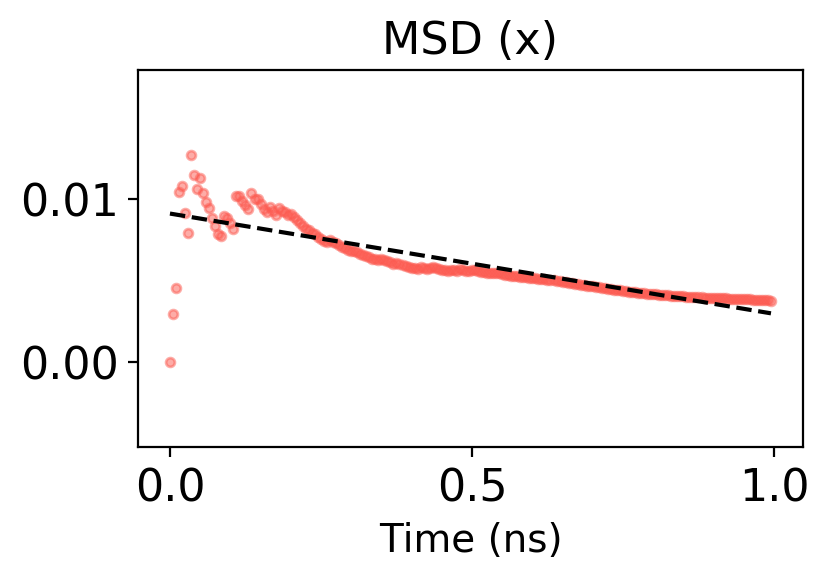

In [28]:
fig = plt.figure(figsize=settings['figsize'], dpi=settings['dpi'])
fig.subplots_adjust(hspace=settings['subplots_adjust'][0], wspace=settings['subplots_adjust'][1])
if settings['suptitle'] is not None:
    fig.suptitle(settings['suptitle'], fontsize=settings['fontsize']['suptitle'], y=1.05)
for idx, axis in enumerate(settings['directions'], start=1):
    ax = fig.add_subplot(1, len(settings['directions']), idx)
    ax.scatter(msd_data['time'], msd_data[axis], s=10, alpha=0.5, c=settings['color'][axis])
    ax.tick_params(labelsize=settings['fontsize']['tick'], labelcolor=settings['color']['tick'])
    plt.title('MSD (%s)' % axis, fontsize=settings['fontsize']['title'])
    plt.xlabel('Time (%s)' % settings['time_unit'], fontsize=settings['fontsize']['label'])
    
    # Linear fitting
    if settings['fit'] is not None:
        msd_fit = [msd_data['a'][axis] * x + msd_data['b'][axis] for x in msd_data['time']]
        ax.plot(msd_data['time'], msd_fit, '%s--' % settings['color']['fit'])
        
        diff_text = settings['fit']['text'] % (msd_data['d0'][axis], msd_data['r2'][axis])
        
        plt.text(msd_data['time'][-1] * settings['fit']['loc'][0], ax.get_ylim() * 0.9, diff_text, color=settings['color']['fit'], fontsize=settings['fontsize']['fit'], bbox=settings['fit']['box'])
        
if save is not None:
    plt.savefig(save, dpi=settings['dpi'], transparent=True, bbox_inches='tight')
    print('Saved -> %s' % save)

In [11]:
msd_fit[-1]

0.038817537965865831

(-0.0063978640657649955, 0.042209306276820333)